In [125]:
import numpy as np
import pandas as pd
from simple_stream import *
from ocr import *
from cano import *
from useful_functions import *
from graphparser import *

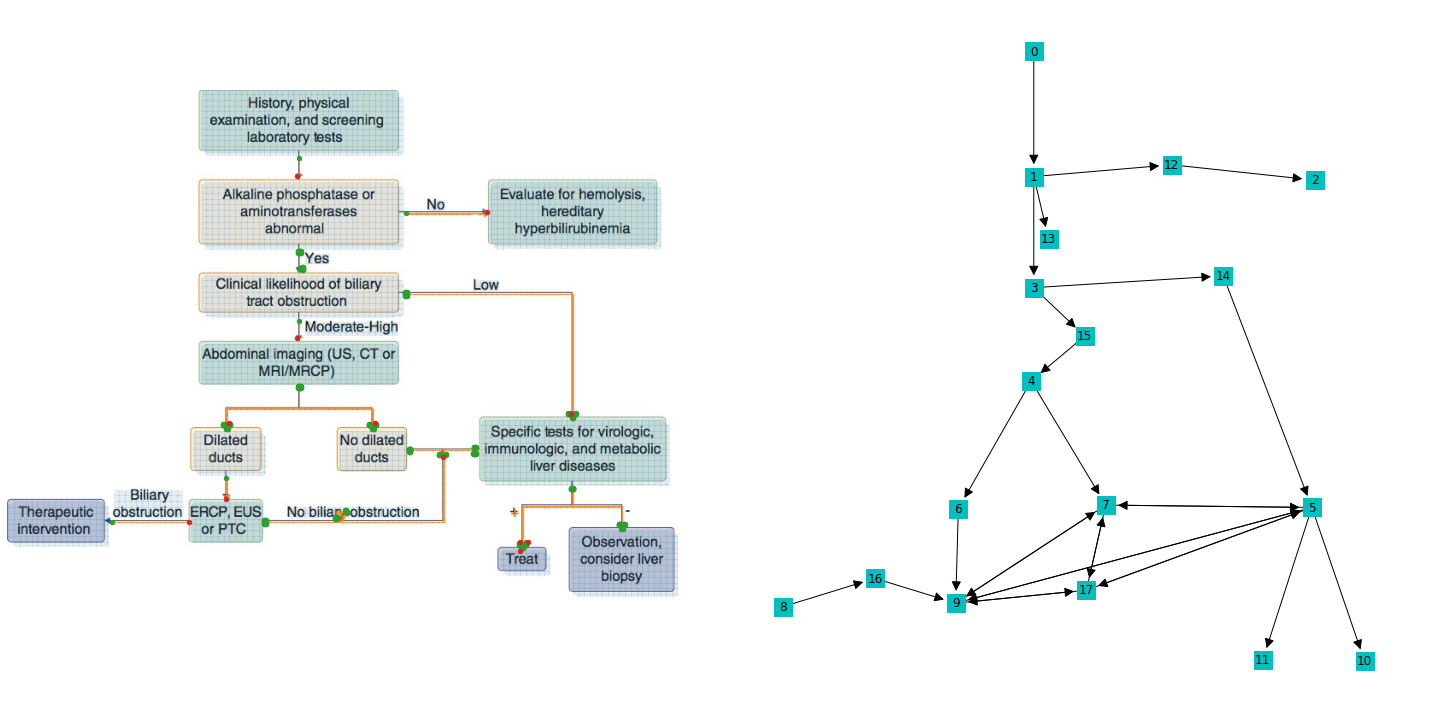

In [38]:
# parses flowchart image to directed graph
file_list = glob.glob('all_test_images/*')
filename = file_list[1]

P = parse_flowchart(filename, 
                    shaded=True,
                    shadows=True,
                    verbose=False)


disp_plot(P, notebook_toggle=True)

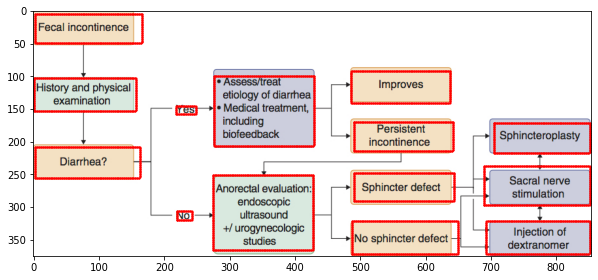

In [91]:
# mask-rcnn based box detection
from mask_rcnn_boxes import *
bi = get_frames(filename)
im = Image.open(filename)
bigg(plt)
plt.imshow(im)
plot_col(bi,s=1,c='red')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


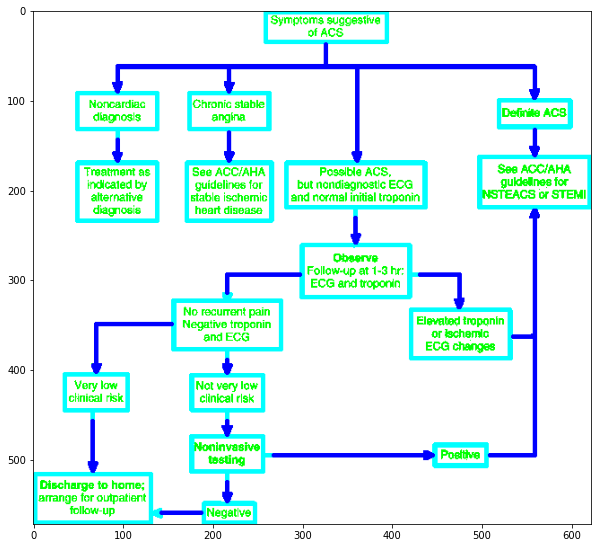

In [6]:
# gan based box/arrow/letter detection
from frame_splitter import frame_text_splitter
imr = frame_text_splitter(filename)
bigg(plt)
plt.imshow(imr)

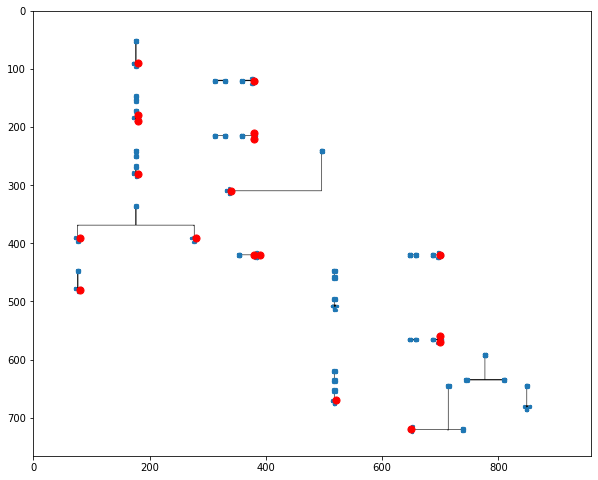

In [129]:
# 3 layer cnn based head/tail detection
bigg(plt)
plt.imshow(1-picture_this(arrows,d_chart),cmap='gray')
plot_col(X8,s=5)
plot_col(head_tile(1-picture_this(arrows,d_chart)),s=50,c='r')

auc: 0.9937201629909705


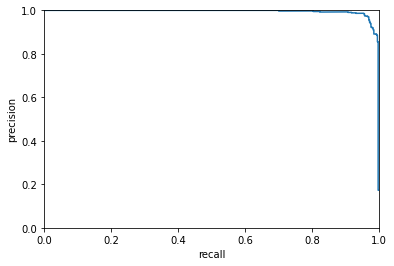

In [82]:
# Efficientnet (image) and Biobert (caption) based flowchart classification 
from sklearn.metrics import precision_recall_curve,auc
pg,rg,_ = precision_recall_curve(y_test,y_pred[:,1])
plt.plot(rg,pg)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('recall')
plt.ylabel('precision')
print('auc:',auc(rg,pg))

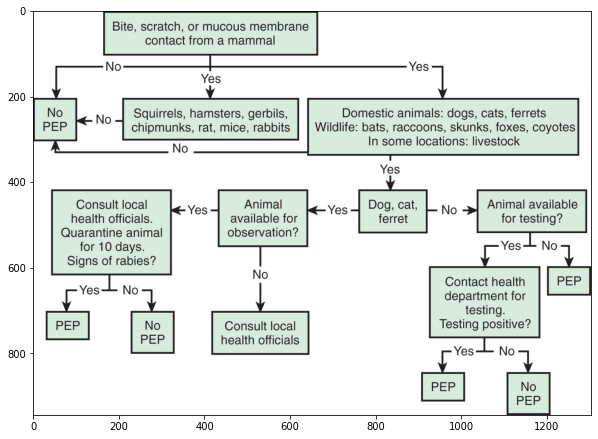

title: Chapter 300 - Rabies - Fig. 300.1
caption: Algorithm for evaluating a child for rabies postexposure prophylaxis. This and any other algorithm should be used in concert with local epidemiologic information regarding the incidence of animal rabies in any given location.


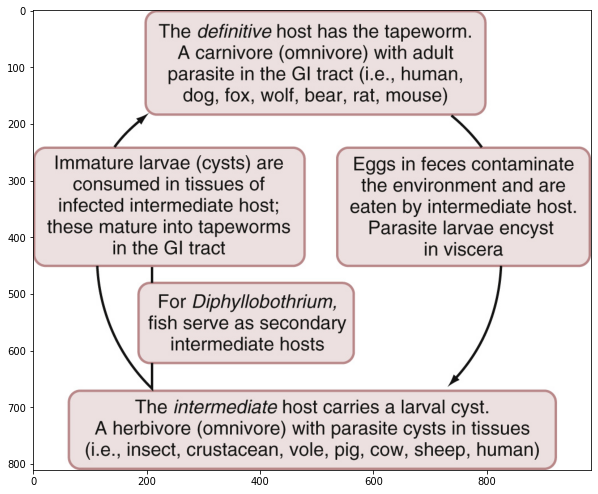

title: 289 - Tapeworms (Cestodes) - FIG. 289.1
caption: Cestode parasites alternate larval and adult stages in two different hosts. GI, Gastrointestinal.


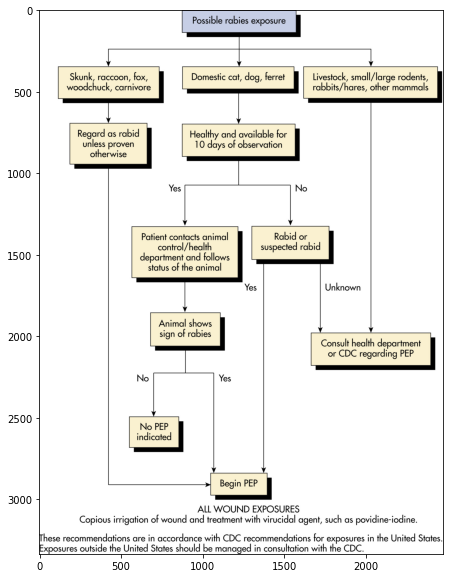

title: Rabies - FIG. E1
caption: Approach to assessing rabies exposure and initiating postexposure prophylaxis (PEP) in the U.S. CDC, Centers for Disease Control and Prevention.


In [23]:
# vector indexing of flowcharts from 30 books
from dt_search import vector_search
        
vector_search('donkey',3)

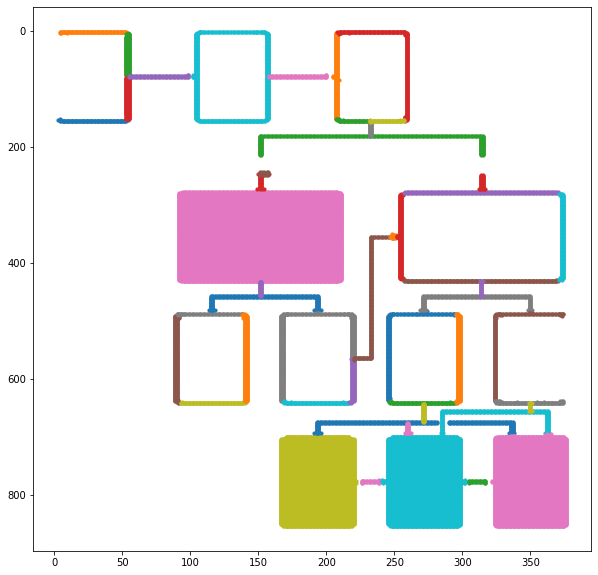

In [160]:
# experimental cellular automata based image segmentation
bigg(plt)
for n in new_objects:
    plot_col(n,s=10)
flip(plt)